In [ ]:
## import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Give dataset path
train_path = '/content/drive/MyDrive/Data_DL/train'
test_path = '/content/drive/MyDrive/Data_DL/test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Data_DL/test/*')

In [ ]:
len(folders)

4

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
#no flip and zoom for test dataset

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Data_DL/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Data_DL/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 441s 7s/step - loss: 2.0805 - accuracy: 0.7473 - val_loss: 0.3913 - val_accuracy: 0.9444
Epoch 2/20
61/61 [==============================] - 33s 538ms/step - loss: 0.6477 - accuracy: 0.8872 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 3/20
61/61 [==============================] - 33s 535ms/step - loss: 0.5507 - accuracy: 0.9067 - val_loss: 0.4469 - val_accuracy: 0.8889
Epoch 4/20
61/61 [==============================] - 33s 541ms/step - loss: 0.5156 - accuracy: 0.9195 - val_loss: 0.9381 - val_accuracy: 0.8333
Epoch 5/20
61/61 [==============================] - 33s 535ms/step - loss: 0.6800 - accuracy: 0.9077 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 33s 533ms/step - loss: 0.4615 - accuracy: 0.9313 - val_loss: 0.3128 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 32s 531ms/step - loss: 0.3717 - accuracy: 0.9416 - val_loss: 3.0661e-04 - val_accuracy: 1.00

In [ ]:
import matplotlib.pyplot as plt

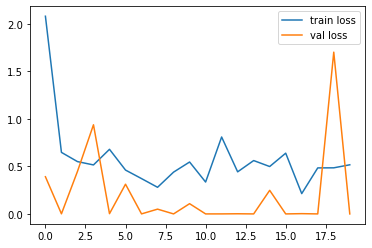

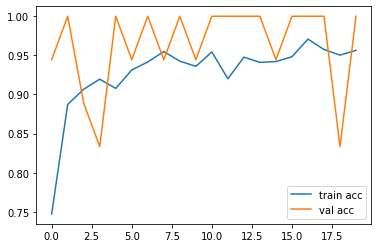

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[1.8022226e-29, 1.8772846e-05, 2.8313023e-09, 9.9998128e-01],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 4.6288240e-30],
       [1.0000000e+00, 0.0000000e+00, 2.2733772e-22, 1.1625657e-18],
       [3.4312981e-34, 0.0000000e+00, 1.0000000e+00, 2.4919933e-36],
       [0.0000000e+00, 7.0985716e-35, 3.4185918e-38, 1.0000000e+00],
       [2.8336517e-35, 6.5428656e-24, 1.0000000e+00, 3.3517168e-15],
       [1.7654763e-37, 9.9999988e-01, 6.3787092e-16, 8.2268755e-08],
       [3.6150672e-15, 3.2372282e-29, 1.0000000e+00, 8.4644124e-25],
       [1.1718036e-27, 1.2366833e-07, 1.0471776e-19, 9.9999988e-01],
       [0.0000000e+00, 6.7198440e-20, 1.0000000e+00, 7.3292458e-34],
       [0.0000000e+00, 3.8216539e-22, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 3.2109788e-16, 1.8165352e-16],
       [3.7004705e-23, 1.9022970e-31, 1.0000000e+00, 1.4176124e-19],
       [9.9338865e-30, 2.3842946e-

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([3, 1, 0, 2, 3, 2, 1, 2, 3, 2, 3, 1, 1, 2, 3, 0, 0, 1])

In [ ]:
from tensorflow.keras.preprocessing import image

In [36]:
classes =["fresh cotton plant","fresh cotton leaf", "diseased cotton plant" , "diseased cotton leaf"]

In [49]:
def predict_cotton_disease(img):
    plt.figure(figsize=(40,8))
    print('Prediction of Cotton Disease:')
    print()
    x=image.img_to_array(img)
    x=x/255
    plt.imshow(img)
    x=np.expand_dims(x,axis=0)
    img_data=preprocess_input(x)

    print(classes[np.argmax(model.predict(img_data))])

Prediction of Cotton Disease:

diseased cotton leaf


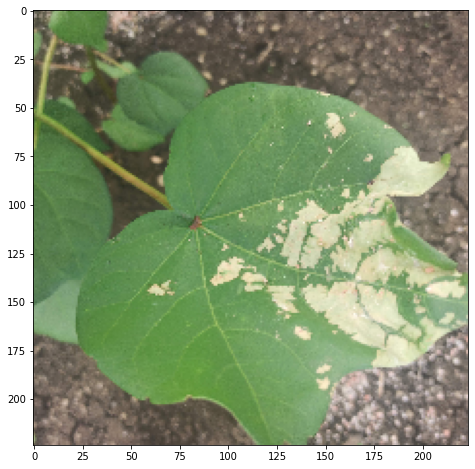

In [50]:
predict_cotton_disease(img)

In [51]:
img_2=image.load_img('/content/drive/MyDrive/Data_DL/test/fresh cotton leaf/d (378).jpg',target_size=(224,224))

Prediction of Cotton Disease:

fresh cotton plant


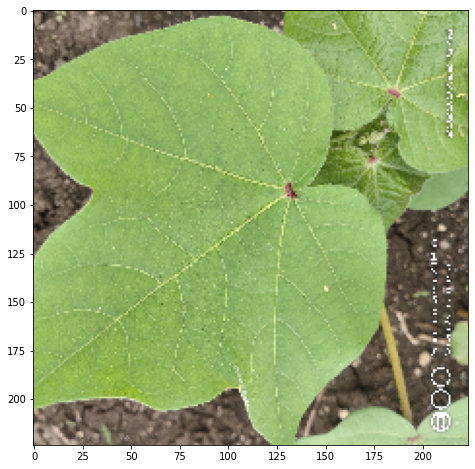

In [52]:
predict_cotton_disease(img_2)

In [53]:
img_3=image.load_img('/content/drive/MyDrive/Data_DL/test/fresh cotton leaf/d (384).jpg',target_size=(224,224))

Prediction of Cotton Disease:

diseased cotton leaf


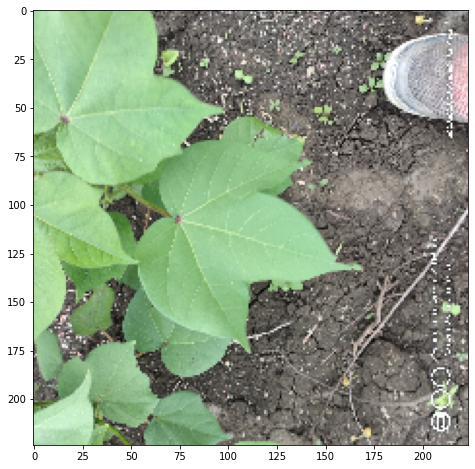

In [54]:
predict_cotton_disease(img_3)

In [56]:
img_4=image.load_img('/content/drive/MyDrive/Data_DL/test/fresh cotton plant/dsd (223).jpg',target_size=(224,224))

Prediction of Cotton Disease:

fresh cotton plant


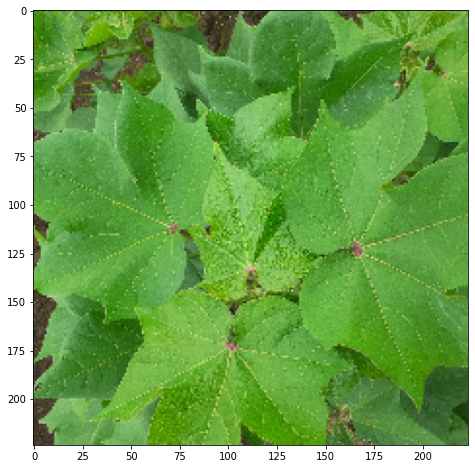

In [57]:
predict_cotton_disease(img_4)

In [58]:
img_5=image.load_img('/content/drive/MyDrive/Data_DL/test/diseased cotton plant/dd (367).jpg',target_size=(224,224))

Prediction of Cotton Disease:

diseased cotton leaf


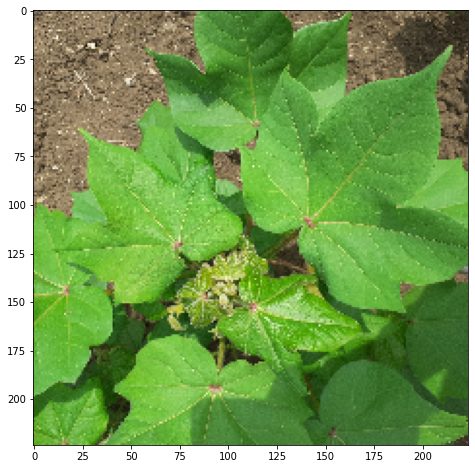

In [59]:
predict_cotton_disease(img_5)

Prediction of Cotton Disease:

diseased cotton leaf


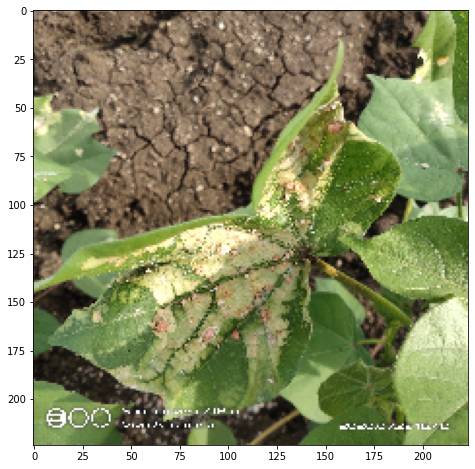

In [60]:
img_6=image.load_img('/content/drive/MyDrive/Data_DL/test/diseased cotton leaf/dis_leaf (322).jpg',target_size=(224,224))
predict_cotton_disease(img_6)